In [2]:
import pandas as pd

# Path to the text file
input_file = r'C:\CodSoft_Projects\archive\Genre Classification Dataset\train_data.txt'

# Empty list to store the parsed data
data = []

# Open the file and process each line
with open(input_file, 'r', encoding='utf-8') as file:
    for line in file:
        # Spliting the line into parts using ':::' as the delimiter
        parts = line.strip().split(' ::: ')
        if len(parts) == 4:  # To ensure there are exactly 4 parts
            data.append(parts)

# Converting the list to a DataFrame
df = pd.DataFrame(data, columns=['ID', 'Title', 'Genre', 'Description'])

# Save the DataFrame to a CSV file
output_file = 'output_train_dataset.csv'
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"File converted and saved as {output_file}")


File converted and saved as output_train_dataset.csv


In [3]:
# Load the training data
df = pd.read_csv('output_train_dataset.csv')

In [5]:
df.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [8]:
import re

def clean_text(text):
    text = text.lower()  # to convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # to remove text in square brackets
    text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)  # to remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # to remove words containing numbers
    return text

# Apply the cleaning function to the Clean Description column
df['Clean_Description'] = df['Description'].apply(clean_text)


In [12]:
df.head()

,ID,Title,Genre,Description,Clean_Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,a brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,as the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,to help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,the films title refers not only to the unrecov...


In [13]:
pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/fc/85/0d1038f068900896a8590d6d0da198b90d31f731a39166a432aa2b92249b/regex-2023.10.3-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 341.2 kB/s eta 0:00:00
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/269.6 kB ? eta -:--:--
   ---------- ----------------------------- 71.7/269.6 kB 2.0 MB/s eta 0:00:01
   --------------------- ------------------ 143.4/269.6 kB 1.7 MB/s eta 0:00:01
   ------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import nltk
from nltk.corpus import stopwords

# NLTK stopwords
nltk.download('stopwords')

# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

# Applying the function to the cleaned descriptions
df['Clean_Description'] = df['Clean_Description'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\100ab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df.head()

,ID,Title,Genre,Description,Clean_Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening conversation doctor parents oscar le...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,films title refers unrecovered bodies ground z...


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Clean_Description'], df['Genre'], test_size=0.2, random_state=42)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
# max_features to limit the number of features (vocabulary) that the vectorizer will learn
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

# Fit and transform the training data 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data 
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Defining the models and their pipelines
models = {
    "Naive Bayes": Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
        ('clf', MultinomialNB()),
    ]),
    "Logistic Regression": Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
        ('clf', LogisticRegression(max_iter=1000)),
    ]),
    "SVM": Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
        ('clf', SVC()),
    ])
}

# Model Training
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} has been trained.")


Naive Bayes has been trained.
Logistic Regression has been trained.
SVM has been trained.


In [24]:
from sklearn.metrics import classification_report

# Evaluate each model
for model_name, model in models.items():
    predictions = model.predict(X_test)
    print(f"Evaluation of {model_name}")
    print(classification_report(y_test, predictions))

Evaluation of Naive Bayes


c:\Users\100ab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\100ab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\100ab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

      action       0.65      0.10      0.17       263
       adult       1.00      0.05      0.10       112
   adventure       0.31      0.04      0.06       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.50      0.44      0.47      1443
       crime       0.00      0.00      0.00       107
 documentary       0.58      0.89      0.70      2659
       drama       0.46      0.83      0.59      2697
      family       1.00      0.01      0.01       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.15      0.26        40
     history       0.00      0.00      0.00        45
      horror       0.71      0.34      0.46       431
       music       0.79      0.13      0.23       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0.00        56
        news       0.00    

c:\Users\100ab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\100ab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\100ab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

      action       0.53      0.26      0.35       263
       adult       0.76      0.20      0.31       112
   adventure       0.49      0.17      0.26       139
   animation       0.62      0.08      0.14       104
   biography       0.00      0.00      0.00        61
      comedy       0.52      0.59      0.55      1443
       crime       0.20      0.01      0.02       107
 documentary       0.66      0.85      0.74      2659
       drama       0.54      0.78      0.64      2697
      family       0.46      0.08      0.14       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.45      0.62        40
     history       0.00      0.00      0.00        45
      horror       0.62      0.54      0.58       431
       music       0.65      0.47      0.55       144
     musical       0.33      0.02      0.04        50
     mystery       0.00      0.00      0.00        56
        news       1.00    

c:\Users\100ab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.54      0.20      0.29       263
       adult       0.73      0.17      0.28       112
   adventure       0.40      0.10      0.16       139
   animation       0.43      0.03      0.05       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.56      0.53      1443
       crime       0.00      0.00      0.00       107
 documentary       0.65      0.87      0.74      2659
       drama       0.51      0.81      0.63      2697
      family       0.53      0.06      0.11       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.42      0.60        40
     history       0.00      0.00      0.00        45
      horror       0.66      0.55      0.60       431
       music       0.69      0.41      0.52       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0.00        56
        news       0.00    

c:\Users\100ab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\100ab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.6 kB 1.4 MB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.6 kB 825.8 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.6 kB 1.1 MB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.6 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


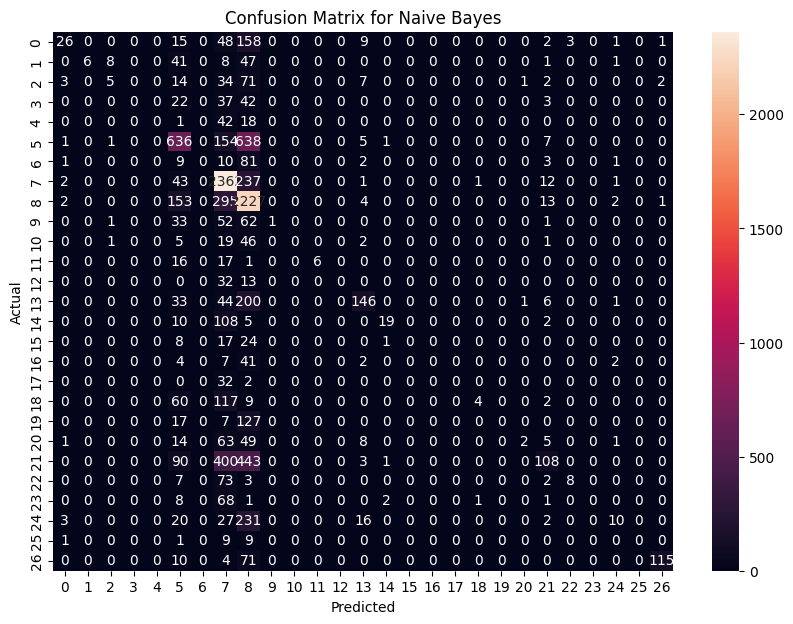

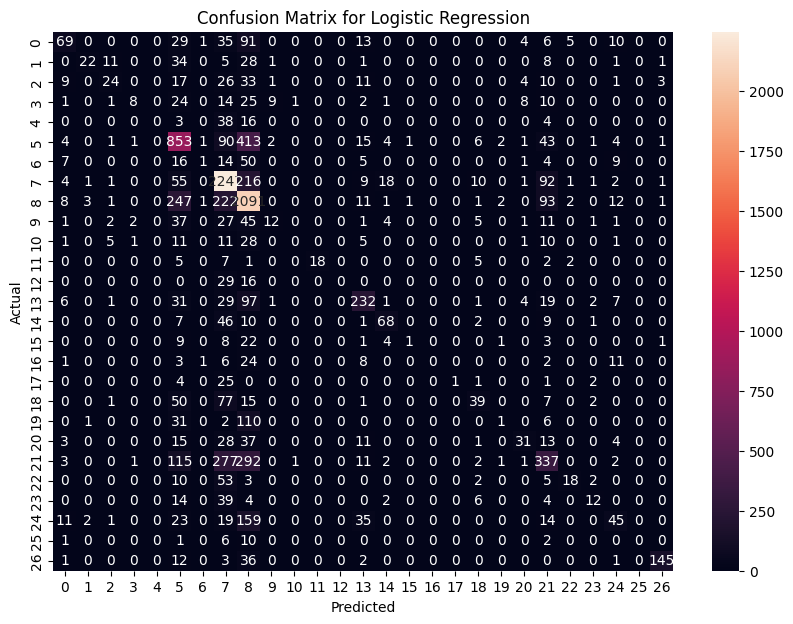

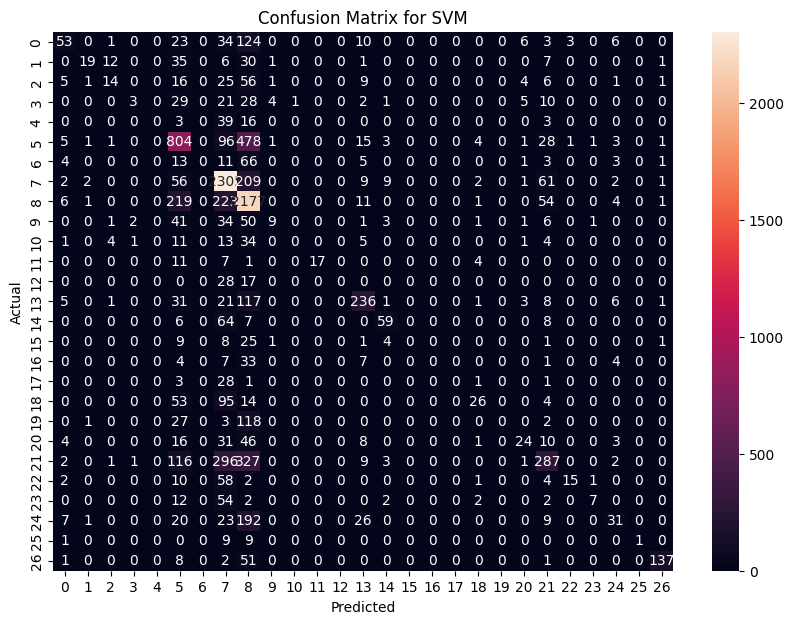

In [27]:
# Confusion matrix to provide a summary of the predictive performance of a classification algorithm.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for model_name, model in models.items():
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialized a dictionary to store metrics
model_metrics = {}

# Calculation of metrics for each model and store them
for model_name, model in models.items():
    predictions = model.predict(X_test)
    model_metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, predictions, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, predictions, average='weighted', zero_division=0)
    }

# Converting from dictionary to a DataFrame for better visualization
metrics_df = pd.DataFrame(model_metrics).T
print(metrics_df)


                     Accuracy  Precision    Recall  F1 Score
Naive Bayes          0.523932   0.525797  0.523932  0.443778
Logistic Regression  0.578714   0.549952  0.578714  0.536927
SVM                  0.574011   0.546901  0.574011  0.522007


In [29]:
"""
Model Performance Analysis

Accuracy:
Logistic Regression has the highest accuracy (57.87%), followed closely by SVM (57.40%), 
and Naive Bayes has the lowest (52.39%). 
This suggests that Logistic Regression and SVM are slightly better at correctly classifying movie genres overall.


2. Precision:
Naive Bayes leads in precision (52.58%), followed by SVM (54.69%) 
and Logistic Regression (54.99%). 
Higher precision indicates a lower rate of false positives. 
Naive Bayes is slightly better at ensuring that when it predicts a genre, it's correct.


3. Recall:
The recall is the same as accuracy in this case because it's a multi-class classification problem, 
and the recall is calculated as the weighted average.


4. F1 Score:
Logistic Regression has the highest F1 score (53.69%), followed by SVM (52.20%) and Naive Bayes (44.38%). 
The F1 score is a balance between precision and recall. 
A higher F1 score for Logistic Regression suggests 
it has a better balance between precision and recall compared to the other models.

"""

"\nModel Performance Analysis\nAccuracy:\n\nLogistic Regression has the highest accuracy (57.87%), followed closely by SVM (57.40%), and Naive Bayes has the lowest (52.39%). This suggests that Logistic Regression and SVM are slightly better at correctly classifying movie genres overall.\n2. Precision:\nNaive Bayes leads in precision (52.58%), followed by SVM (54.69%) and Logistic Regression (54.99%). Higher precision indicates a lower rate of false positives. Naive Bayes is slightly better at ensuring that when it predicts a genre, it's correct.\n3. Recall:\nThe recall is the same as accuracy in this case because it's a multi-class classification problem, and the recall is calculated as the weighted average.\n4. F1 Score:\nLogistic Regression has the highest F1 score (53.69%), followed by SVM (52.20%) and Naive Bayes (44.38%). The F1 score is a balance between precision and recall. A higher F1 score for Logistic Regression suggests it has a better balance between precision and recall c

In [31]:
import joblib

# Save each model
for model_name, model in models.items():
    filename = f'{model_name}_model.joblib'
    joblib.dump(model, filename)

In [37]:
def predict_genre(description, model_name):
    # Load the saved model
    model = joblib.load(f'{model_name}_model.joblib')

    # Directly predict using the model (the TF-IDF transformation will be applied automatically)
    predicted_genre = model.predict([description])  # No need for separate TF-IDF transformation
    return predicted_genre[0]



In [35]:
def user_interface():
    print("Select a model for genre prediction:")
    print("1. Naive Bayes\n2. Logistic Regression\n3. SVM")
    choice = input("Enter the number of your choice: ")

    model_name = ""
    if choice == '1':
        model_name = "Naive Bayes"
    elif choice == '2':
        model_name = "Logistic Regression"
    elif choice == '3':
        model_name = "SVM"
    else:
        print("Invalid choice. Exiting.")
        return

    description = input("Enter the movie description: ")
    genre = predict_genre(description, model_name)
    print(f"The predicted genre is: {genre}")




In [38]:
# Run the user interface
user_interface()


Select a model for genre prediction:
1. Naive Bayes
2. Logistic Regression
3. SVM
The predicted genre is: drama
